In [1]:
import tensorflow as tf
import numpy as np
from IPython.display import Image

# Import MINST handwritten digits data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz


![Image of Yaktocat](http://i.ytimg.com/vi/0QI3xgXuB-Q/hqdefault.jpg)

In [2]:
train_data =  mnist.train.images.reshape([-1,28,28])
train_labels = mnist.train.labels
test_data = mnist.test.images.reshape([-1,28,28])
test_labels = mnist.test.labels

In [3]:
train_data.shape

(55000, 28, 28)

In [4]:
test_data.shape

(10000, 28, 28)

In [5]:
test_labels.shape

(10000, 10)

Label number : 7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


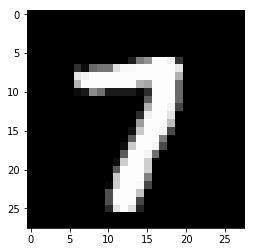

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

data_index = 9990     # 0 ~ 9999

plt.imshow(test_data[data_index],cmap='gray')
print ('Label number : ' + str(np.argmax(test_labels[data_index])))
print (test_labels[data_index])

## Data stat

In [7]:
# Network Parameters
n_input = 28 # MNIST data input (img shape: 28*28)
n_steps = 28 # timesteps
n_classes = 10 # MNIST total classes (0-9 digits)



## Draw Your Graph

In [8]:
# tf Graph input
x = tf.placeholder("float", [None, n_steps, n_input])
y = tf.placeholder("float", [None, n_classes])

In [9]:
print (x)
print (y)

Tensor("Placeholder:0", shape=(?, 28, 28), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


![Image of Yaktocat](https://ml4a.github.io/images/figures/mnist_1layer.png)

Multinomial regression

In [10]:
x_v = tf.reshape(x, [-1, 28*28])

# n_input * n_input == 784
weights = tf.Variable(tf.truncated_normal([n_input * n_input, n_classes]))
biases = tf.Variable(tf.zeros([n_classes]))
logit = tf.matmul(x_v, weights) + biases
prediction = logit

![Image of Yaktocat](https://ml4a.github.io/images/figures/mnist_2layers.png)

Neural Network prediction

In [44]:
size_of_hidden = 128
x_v = tf.reshape(x, [-1, 28*28])
weights_1 = tf.Variable(tf.truncated_normal([n_input * n_input, size_of_hidden]))
biases_1 = tf.Variable(tf.zeros([size_of_hidden]))
logits_1 = tf.matmul(x_v, weights_1) + biases_1
output_1 = tf.nn.relu(logits_1)

weights_2 = tf.Variable(tf.truncated_normal([size_of_hidden, n_classes]))
biases_2 = tf.Variable(tf.zeros([n_classes]))
logit = tf.matmul(output_1, weights_2) + biases_2
prediction = tf.sigmoid(logit)

In [43]:
weights_1.get_shape()

TensorShape([Dimension(784), Dimension(128)])

DNN simple version

In [15]:
x_v = tf.reshape(x, [-1, 28*28])
hidden = tf.contrib.layers.fully_connected(x_v,size_of_hidden,activation_fn=tf.nn.relu)
prediction = tf.contrib.layers.fully_connected(hidden,n_classes,activation_fn=tf.nn.sigmoid)

CNN prediction

![Image of Yaktocat](https://www.packtpub.com/sites/default/files/Article-Images/B05478_image001.png)

In [13]:
kernel_size = 3
input_channel = 1
out_channel = 32
hidden_node = 128
keep_prob = 1

layer1_weights = tf.Variable(tf.truncated_normal([kernel_size, kernel_size, input_channel, out_channel], stddev=0.1))
layer1_biases = tf.Variable(tf.zeros([out_channel]))

layer2_weights = tf.Variable(tf.truncated_normal([n_input // 4 * n_input // 4 * out_channel, hidden_node], stddev=0.1))
layer2_biases = tf.Variable(tf.constant(0.01, shape=[hidden_node]))

layer3_weights = tf.Variable(tf.truncated_normal([hidden_node, n_classes], stddev=0.1))
layer3_biases = tf.Variable(tf.constant(0.01, shape=[n_classes]))

x_cnn = tf.reshape(x, [-1,n_input,n_input,input_channel])

conv = tf.nn.conv2d(x_cnn, filter=layer1_weights, strides=[1, 2, 2, 1], padding='VALID') 
hidden = tf.nn.relu(conv + layer1_biases)

pool = tf.nn.max_pool(hidden, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

shape = pool.get_shape().as_list()
reshape = tf.reshape(pool, [-1, shape[1] * shape[2] * shape[3]])

hidden = tf.nn.relu(tf.matmul(reshape, layer2_weights) + layer2_biases)

logit = tf.matmul(hidden, layer3_weights) + layer3_biases
prediction= tf.sigmoid(logit)

CNN simple version

In [69]:
input_channel = 1
out_channel = 32
hidden_node = 128

x_cnn = tf.reshape(x, [-1,28,28,input_channel])
layer1 = tf.contrib.layers.conv2d(x_cnn,out_channel,kernel_size=3,activation_fn=tf.nn.relu, padding='SAME')
pool1 = tf.nn.max_pool(layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
pool1_flat = tf.reshape(pool1, [-1, 14*14*out_channel])
hidden = tf.contrib.layers.fully_connected(pool1_flat,hidden_node,activation_fn=tf.nn.relu)
prediction = tf.contrib.layers.fully_connected(hidden,n_classes,activation_fn=tf.nn.sigmoid)

<tf.Tensor 'MaxPool_2:0' shape=(?, 14, 14, 16) dtype=float32>

Draw your own Best code!

In [17]:
x_cnn = tf.reshape(x, [-1,28,28,1])
# Implement model!

prediction = tf.contrib.layers.fully_connected(hidden,10,activation_fn=tf.nn.sigmoid)


Reproduce this model!
![Image of Yaktocat](http://7xi3e9.com1.z0.glb.clouddn.com/cnnmnist.png)

In [64]:
x_cnn = tf.reshape(x, [-1,28,28,1])
# Reproduce model!



#layer1 = tf.contrib.layers.conv2d(x_cnn,32,kernel_size=5,activation_fn=tf.nn.relu, padding='SAME')
#pool1 = tf.nn.max_pool(layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
#layer2 = tf.contrib.layers.conv2d(pool1,64,kernel_size=5,activation_fn=tf.nn.relu, padding='SAME')
#pool2 = tf.nn.max_pool(layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

#pool2_flat = tf.reshape(pool2, [-1, 7*7*64])
#hidden = tf.contrib.layers.fully_connected(pool2_flat,1024,activation_fn=tf.nn.relu)
#hidden2 = tf.contrib.layers.fully_connected(hidden,1024,activation_fn=tf.nn.relu)

prediction = tf.contrib.layers.fully_connected(hidden2,10,activation_fn=tf.nn.sigmoid)


## Launch Your Graph : Start Training!

Cross Entropy Loss and Initialize all variables

In [18]:
learning_rate = 0.001

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [19]:
# Launch the graph

# Training Parameters
training_iters = 100000
batch_size = 128
display_step = 10

with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Reshape data to get 28 seq of 28 elements
        batch_x = batch_x.reshape((batch_size, n_steps, n_input))
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        if step % display_step == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            print("Iter {}, Minibatch Loss={:.6f}, Training Accuracy={:.5f}".format(step,
                                                                                    loss, acc))
        step += 1
    print("Optimization Finished!")

    # Calculate accuracy for 128 mnist test images
    test_len = 128
    test_data = mnist.test.images[:test_len].reshape((-1, n_steps, n_input))
    test_label = mnist.test.labels[:test_len]
    print("Testing Accuracy:{}".format(sess.run(accuracy, feed_dict={x: test_data, y: test_label})))
    predicted_prob = sess.run(prediction, feed_dict={x: test_data})

Iter 10, Minibatch Loss=1.753315, Training Accuracy=0.74219
Iter 20, Minibatch Loss=1.628806, Training Accuracy=0.81250
Iter 30, Minibatch Loss=1.607062, Training Accuracy=0.80469
Iter 40, Minibatch Loss=1.546684, Training Accuracy=0.91406
Iter 50, Minibatch Loss=1.548314, Training Accuracy=0.89844
Iter 60, Minibatch Loss=1.524664, Training Accuracy=0.93750
Iter 70, Minibatch Loss=1.504262, Training Accuracy=0.95312
Iter 80, Minibatch Loss=1.531224, Training Accuracy=0.92969
Iter 90, Minibatch Loss=1.518533, Training Accuracy=0.93750
Iter 100, Minibatch Loss=1.497614, Training Accuracy=0.95312
Iter 110, Minibatch Loss=1.497169, Training Accuracy=0.96875
Iter 120, Minibatch Loss=1.506083, Training Accuracy=0.91406
Iter 130, Minibatch Loss=1.486125, Training Accuracy=0.96875
Iter 140, Minibatch Loss=1.488708, Training Accuracy=0.96875


KeyboardInterrupt: 

In [14]:
predicted_prob.shape

(128, 10)

## Result Analysis!

In [20]:
wrong_list=np.where(np.argmax(predicted_prob,1) != np.argmax(test_label,1))[0].tolist()
print ("Wrong answer list : ")
print (wrong_list)

Wrong answer list : 
[8, 73, 80, 92]


Predicted Label number : 6


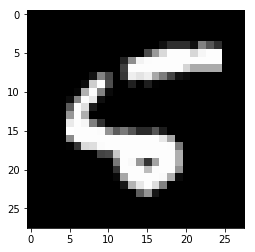

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import time

for ind in wrong_list:
    print ('Predicted Label number : ' + str(np.argmax(predicted_prob[ind])))
    plt.imshow(test_data[ind],cmap='gray')
    plt.show()
    a = input('Next plot?\n')
    if a == 'q':
        break

Lenet - 1 CNN의 전신

![Image of Yaktocat](http://blogthumb2.naver.net/20160307_154/laonple_1457362135978fdcpT_JPEG/1.jpg?type=w2)

Lenet - 5 : Convolution + fully connected network

![Image of Yaktocat](https://i1.read01.com/uploads/0F0bSLiV4J.jpg)

초기 MNIST 성능비교
![Image of Yaktocat](http://postfiles7.naver.net/20160307_246/laonple_14573621369260G69J_JPEG/3.jpg?type=w2)